In [1]:
import numpy as np
import os
import PIL
import tensorflow as tf

In [2]:
print(tf.__version__)

2.6.0


In [3]:
base_dir = "../data.copy/"

In [4]:
from keras.preprocessing import image

In [5]:
img_tensor = []
img_label = []

In [6]:
userfold = '/이흥교'

In [7]:
for imgname in os.listdir(base_dir+userfold+'/true'):
    img = image.load_img(
        base_dir + userfold + '/true' + '/' + imgname, 
        color_mode='grayscale', 
        target_size=(60, 120), 
        interpolation='nearest')
    img_tensor.append(image.img_to_array(img)/255)
    img_label.append(1)
for imgname in os.listdir(base_dir+userfold+'/false'):
    img = image.load_img(
        base_dir + userfold + '/false' + '/' + imgname, 
        color_mode='grayscale', 
        target_size=(60, 120), 
        interpolation='nearest')
    img_tensor.append(image.img_to_array(img)/255)
    img_label.append(0)

In [8]:
img_tensor_np = np.array(img_tensor)
img_label_np = np.array(img_label)

In [9]:
img_tensor_np.shape

(22, 60, 120, 1)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(img_tensor_np, img_label_np, test_size=0.2, random_state=10)

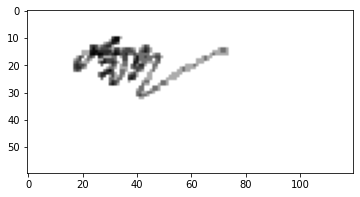

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 3)

plt.imshow(img_tensor_np[0], cmap='gray')
plt.show()

In [13]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16, kernel_size=3, activation='relu', input_shape=(60, 120, 1)))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 58, 118, 16)       160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 59, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 59, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 29, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 14, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [15]:
model.compile(optimizer='adam',
            loss=tf.keras.losses.BinaryCrossentropy(),
            metrics=['accuracy'])

In [16]:
x_train.shape

(17, 60, 120, 1)

In [17]:
epochs = 8

In [18]:
history = model.fit(
    x_train,
    y_train,
    epochs=epochs,
    batch_size=3
)

Epoch 1/8
6/6 [==============================] - 0s 8ms/step - loss: 0.7346 - accuracy: 0.5294
Epoch 2/8
6/6 [==============================] - 0s 7ms/step - loss: 0.6867 - accuracy: 0.5294
Epoch 3/8
6/6 [==============================] - 0s 8ms/step - loss: 0.6837 - accuracy: 0.5294
Epoch 4/8
6/6 [==============================] - 0s 8ms/step - loss: 0.6472 - accuracy: 0.5294
Epoch 5/8
6/6 [==============================] - 0s 8ms/step - loss: 0.5573 - accuracy: 0.7059
Epoch 6/8
6/6 [==============================] - 0s 8ms/step - loss: 0.4141 - accuracy: 0.8824
Epoch 7/8
6/6 [==============================] - 0s 8ms/step - loss: 0.2437 - accuracy: 0.9412
Epoch 8/8
6/6 [==============================] - 0s 8ms/step - loss: 0.1055 - accuracy: 1.0000


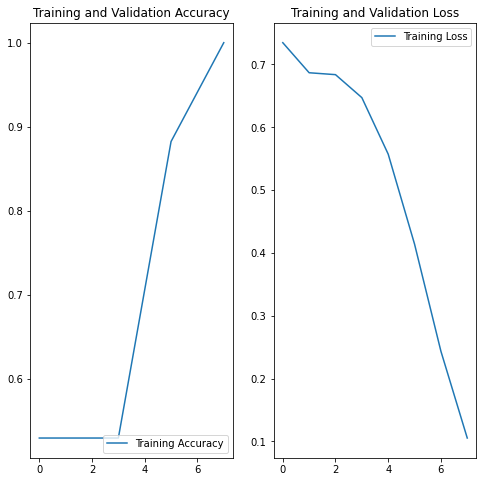

In [19]:
acc = history.history['accuracy']

loss=history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
predictions = model.predict(x_test)

print(userfold)
print(predictions)

/이흥교
[[0.04237926]
 [0.97589374]
 [0.87193286]
 [0.8540369 ]
 [0.98335123]]


In [21]:
x_test.shape

(5, 60, 120, 1)

In [22]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 101ms/step - loss: 0.4292 - accuracy: 0.8000


[0.42918771505355835, 0.800000011920929]